### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

### Loading Dataset

In [2]:
df = pd.read_csv('cleaned_data.csv')

In [3]:
df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,No,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,Male,United States,No,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,No,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,No,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,No,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


### Selecting Features

In [4]:
features = ['family_history', 'treatment', 'mental_health_consequence', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave']
X = df[features]

### Label encoding all features

In [5]:
for col in X.columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

C:\Users\apple\AppData\Local\Temp\ipykernel_27848\83426587.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
C:\Users\apple\AppData\Local\Temp\ipykernel_27848\83426587.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
C:\Users\apple\AppData\Local\Temp\ipykernel_27848\83426587.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

### Scaling the data

In [6]:
#Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Implementing KMeans

c:\Users\apple\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\Users\apple\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\Users\apple\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\Users\apple\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

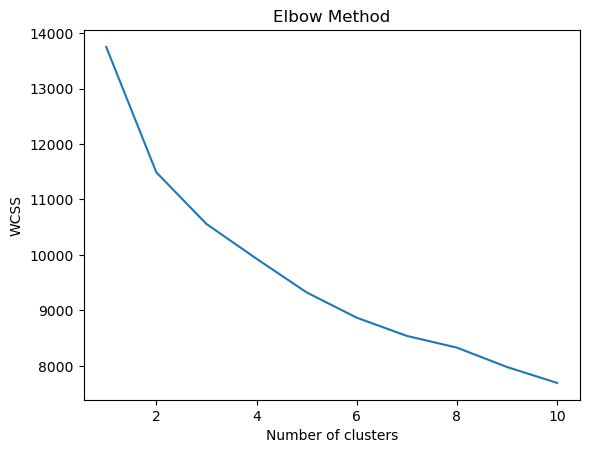

In [7]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Calculating Silhoutte Score

In [8]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(X_scaled)
df['cluster'] = clusters

print(f"KMeans Silhouette Score: {silhouette_score(X_scaled, clusters)}")

KMeans Silhouette Score: 0.12839109786412103


c:\Users\apple\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


### Clustering 

In [9]:
X_clustered = X.copy()
X_clustered['cluster'] = clusters

cluster_summary = X_clustered.groupby('cluster')[features].mean()
print(cluster_summary)

         family_history  treatment  mental_health_consequence  remote_work  \
cluster                                                                      
0              0.493151   0.671233                   0.882192     0.287671   
1              0.577320   0.994845                   0.876289     0.329897   
2              0.169014   0.000000                   0.804829     0.281690   

         tech_company  benefits  care_options  wellness_program  seek_help  \
cluster                                                                      
0            0.769863  1.734247      1.780822          1.452055   1.465753   
1            0.845361  0.927835      0.731959          0.868557   0.667526   
2            0.837022  0.649899      0.517103          0.851107   0.684105   

         anonymity     leave  
cluster                       
0         1.575342  2.013699  
1         0.262887  1.146907  
2         0.267606  1.173038  


### Naming the clusters

In [10]:
cluster_names = {
    0: "Open Advocates",
    1: "Under-Supported Professionals",
    2: "Silent Sufferers"
}

df['persona'] = df['cluster'].map(cluster_names)

print("\nCluster Personas:")
print(df['persona'].value_counts())


Cluster Personas:
persona
Silent Sufferers                 497
Under-Supported Professionals    388
Open Advocates                   365
Name: count, dtype: int64
